# Tests de prueba con Streaming Mode

In [1]:
# import essentia
import math
# from essentia import *
# import essentia.streaming as es
# from essentia.streaming import VectorInput, RealAccumulator
import essentia.standard as std
import IPython.display as ipd
import scipy.io.wavfile as wav
import numpy as np
import matplotlib.pyplot as plt

import librosa
from scipy import spatial, signal 

[   INFO   ] MusicExtractorSVM: no classifier models were configured by default


In [2]:
import test_hprmodel_streaming
#from test_harmonicmodel_streaming import *
from test_hprmodel_streaming import *

In [3]:
input_file = '/mnt/c/Users/bosco/Desktop/TFG/TFG-Kobol-BoscoOlives/rsf_kobol_expander_2-vco/audio/vco1/sawtooth/vco1_5.0_saw.wav'
Fs, data = wav.read(input_file)
print('Original audio Sample Rate: ' + str(Fs))

Original audio Sample Rate: 48000


/tmp/ipykernel_361/2163214396.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, data = wav.read(input_file)


## Función Original
## Analisis & Synthesis - Harmonic Plus Residual Model

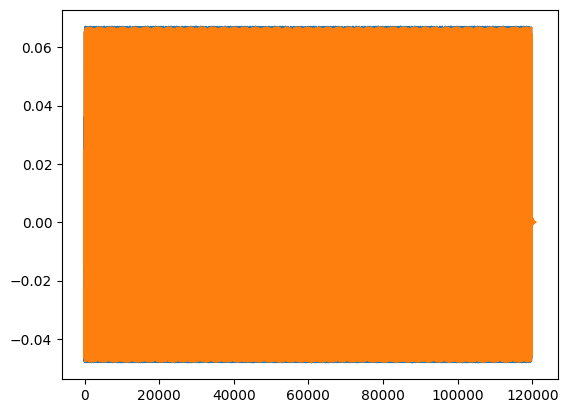

In [4]:
params = { 'frameSize': 2048, 'hopSize': 128, 'startFromZero': False, 'sampleRate': 48000,
          'maxnSines': 100,'magnitudeThreshold': -74,'minSineDur': 0.02,'freqDevOffset': 10, 
          'freqDevSlope': 0.001, 'maxFrequency': 550.,'minFrequency': 65.}

loader = std.MonoLoader(filename = str(input_file), sampleRate=params["sampleRate"])
audio = loader()


# computes analysis/stynthesis Harmonic Plus Residual Model
outsignal,pool = analsynthHprModelStreaming(params, audio)

ipd.display(ipd.Audio(data=audio, rate=params['sampleRate']))
ipd.display(ipd.Audio(data=outsignal, rate=params['sampleRate']))

plt.plot(audio)
plt.plot(outsignal)
plt.show()

Dimensions MFCC Original Audio: (20, 235)
Dimensions MFCC Synthesis Audio: (20, 237)


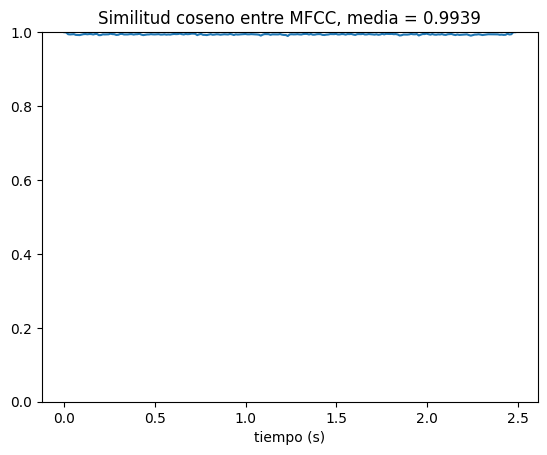

In [5]:
#FUNCION DE SIMILITUD - MFCC Y SMILITIUD COSENO
sampleRate = params['sampleRate']
original_mfcc = librosa.feature.mfcc(y=audio,sr=sampleRate)
syntesis_mfcc = librosa.feature.mfcc(y=outsignal,sr=sampleRate)

#Las dimensiones NO son exactamente iguales, pero para la comparación no parece muy relevante
print('Dimensions MFCC Original Audio: ' + str(original_mfcc.shape))
print('Dimensions MFCC Synthesis Audio: ' + str(syntesis_mfcc.shape))

time_axis = np.arange(0,audio.shape[0]/sampleRate,(audio.shape[0]/sampleRate)/original_mfcc.shape[1])


# similitud coseno
n = original_mfcc.shape[1]
coss_sim = np.zeros(n)

for i in range(n):
    original = original_mfcc[1:, i]
    syntesis = syntesis_mfcc[1:, i]
    coss_sim[i] = 1 - spatial.distance.cosine(original, syntesis)
    
    
similitud = str(np.round(np.mean(coss_sim),4))

plt.title("Similitud coseno entre MFCC, media = "+ similitud)
plt.xlabel("tiempo (s)")
plt.plot(time_axis, coss_sim)
plt.ylim(0,1)


plt.show()

## Función de Análisis creada a partir de la original

In [6]:
params = { 'frameSize': 2048, 'hopSize': 128, 'startFromZero': False, 'sampleRate': 48000,
          'maxnSines': 100,'magnitudeThreshold': -74,'minSineDur': 0.02,'freqDevOffset': 10, 
          'freqDevSlope': 0.001, 'maxFrequency': 550.,'minFrequency': 65.}

# computes analysis Harmonic Plus Residual Model
mags, freqs, phases, res = analBoscoHprModelStreaming(params, audio)


#Las dimensiones del residuo siempre són mayores...
print(mags.shape)
print(freqs.shape)
print(phases.shape)
print(res.shape)

(946, 100)
(946, 100)
(946, 100)
(946, 128)


## Función de Synthesis creada a partir de la original

In [7]:
# computes stynthesis Harmonic Plus Residual Model
outsignal,pool = synthBoscoHprModelStreaming(audio, mags, freqs, phases, res, params)

ipd.display(ipd.Audio(data=data, rate=Fs))
ipd.display(ipd.Audio(data=outsignal, rate=params['sampleRate']))

KeyError: "no key found named 'frames'"